In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
credit = pd.read_csv("credit_card.csv")

In [3]:
# Check 5 sample rows to see the data
credit.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
21882,21883,230000,2,4,2,26,1,-1,2,-1,...,624,1090,2952,500,0,624,1090,2952,1505,0
11415,11416,130000,1,1,2,26,0,-1,0,0,...,69832,46645,11869,105072,5000,3000,12000,10000,3500,0
10429,10430,80000,1,1,2,26,0,0,0,0,...,59217,59955,57100,5990,2500,3000,2500,3000,1500,0
27171,27172,100000,1,1,2,32,0,0,0,0,...,86400,87275,89082,4500,3300,3881,2500,2519,2700,0
14317,14318,360000,2,1,2,27,-1,-1,0,0,...,5228,6552,3827,5317,1007,2006,2562,13,2989,0


In [4]:
# Now check for missing values
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [5]:
# Categorical variable description
credit[['SEX','EDUCATION','MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [15]:
# Few anamolous things are there in Education and Marriage column
# Education have 5,6 which is unlabelled, category 0 is not documented
# Marriage have category 0 which is not documented

In [6]:
# Payment delay description
credit[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe()
# Category -2,0 is not labelled in here, if 1,2,3 represents payment delay for 1 month,2 month,3 month respectively than we can
# consider 0 as pay duly and also -2 as pay duly 

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [7]:
# Bill Statement description
credit[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe()
# Negative statement values can be considered as credit? Need to investigate

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [8]:
# Previous Payment Description
credit[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [9]:
credit['LIMIT_BAL'].describe()
# Variance in limit balance column is high it certainly have outliers 

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [9]:
credit.DEFAULT.sum()/credit.DEFAULT.count()
# 22 % will default 

0.2212

In [10]:
print(credit.shape)
print(credit.shape[0])
print(credit.shape[1])
print(credit.DEFAULT.count())
print(len(credit.axes[1]))

(30000, 25)
30000
25
30000
25


### Machine Learning 
1. First will go with all the features and see what happens and than will compare my base model with other models

#### Start with Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer,f1_score,recall_score,precision_score
from sklearn.model_selection import train_test_split

In [11]:
X = credit.drop(['ID','DEFAULT'], axis = 1)
y = credit['DEFAULT']

In [13]:
y.sample(5)

11534    0
20786    0
8737     0
19484    0
9937     0
Name: DEFAULT, dtype: int64

In [14]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [12]:
# Split the data into train and test, split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 23)
(6000, 23)
(24000,)
(6000,)


In [17]:
# Check the target variable is not far off
print(credit.DEFAULT.describe())
print(y_train.describe())
print(y_test.describe())

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DEFAULT, dtype: float64
count    24000.000000
mean         0.221792
std          0.415460
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DEFAULT, dtype: float64
count    6000.000000
mean        0.218833
std         0.413490
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: DEFAULT, dtype: float64


In [13]:
tree = DecisionTreeClassifier(max_depth = 7, random_state = 123)
tree.fit(X_train,y_train)
predict = tree.predict(X_test)
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

0.8307916666666667
0.8188333333333333


In [14]:
accuracy_score(y_test, predict)
# This is a random model

0.8188333333333333

In [15]:
# Now lets make a overfitting model, model performs well on train data but poor on test data
tree = DecisionTreeClassifier(max_depth = 100, random_state = 123)
tree.fit(X_train,y_train)
predict = tree.predict(X_test)
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

0.9994583333333333
0.725


In [85]:
# It is generally easy to mess up with the model, so generally we dont use this as practise and we use GridSearchCV to fidn the
# best parameters for us so that we again make out best model with those parameters

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
tree = DecisionTreeClassifier()
params = ({'criterion':['gini','entropy'], 'max_depth':np.arange(2,9), 'min_samples_split':np.arange(2,10), 
           'min_samples_leaf':np.arange(2,10), 'max_leaf_nodes':[5,10,20,100]})
grid = GridSearchCV(tree, params, cv = 5)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

KeyboardInterrupt: 

In [ ]:
tree = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
tree.fit(X_train,y_train)
predict = tree.predict(X_test)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

In [14]:
# We got - 0.18% accuracy by choosing the right parameters 

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test,predict)

### K Fold Validation

#### Now we can cross validate by Kfold

In [ ]:
# Now we can cross validate by using Kfold
from sklearn.model_selection import KFold

In [206]:
test = credit.iloc[test_index,:]
test.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0
11,12,260000,2,1,2,51,-1,-1,-1,-1,...,8517,22287,13668,21818,9966,8583,22301,0,3640,0
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
55,56,500000,2,1,1,45,-2,-2,-2,-2,...,0,151,2530,3640,162,0,151,2530,0,0
60,61,500000,2,3,1,28,0,0,0,0,...,14937,13827,15571,1516,1300,1000,1000,2000,2000,1


In [ ]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
fold = []
scr = []

for i,(train_index,test_index) in enumerate(kf.split(credit)):
    train = credit.iloc[train_index,:] # restrict the rows with K-fold 4:1 and all the columns here train have 24000 rows and
    test = credit.iloc[test_index,:]   # test have 6000 rows of data, it will validate 5 times
    X_train = train[X.columns]
    y_train = train['DEFAULT']
    X_test = test[X.columns]
    y_test = test['DEFAULT']
    # Now we have train and test data, Build model on train-test
    tree.fit(X_train,y_train)
    pred = tree.predict(X_test)
    score = accuracy_score(y_test, pred)
    fold.append(i+1) # i value starts from 0 while Kfold starts from 1 thats why we have used i+1
    scr.append(score)
    
accuracy = pd.DataFrame({'Score':scr,'Fold':fold})
print(accuracy)

In [ ]:
# By this we can see that accuracy of our model will wary from 0.814 to 0.827. Also we can compare different model to find the 
# most suitable model.

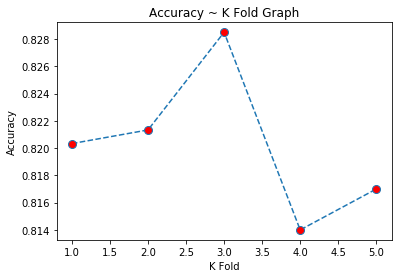

In [250]:
plt.plot(accuracy['Fold'], accuracy['Score'], 'o-', markerfacecolor = 'r', linestyle = '--', markersize = 8)
plt.xlabel('K Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy ~ K Fold Graph')
plt.show()

In [18]:
# Feature Importance function for Decision Tree, according to K Fold
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

get_feature_importance(tree, X.columns)

,feat,score
5,PAY_1,0.673541
6,PAY_2,0.163366
19,PAY_AMT3,0.069889
0,LIMIT_BAL,0.032804
11,BILL_AMT1,0.020791
7,PAY_3,0.009668
10,PAY_6,0.007136
2,EDUCATION,0.006250
9,PAY_5,0.004989
22,PAY_AMT6,0.003653


In [ ]:
# Here pay_1 and pay_2 are so important so lets try to build a model on that two attributs only and check how model works

In [18]:
X = credit[['PAY_1','PAY_2']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
tree.fit(X_train,y_train)
prediction = tree.predict(X_test)
accuracy_score(y_test, prediction)

0.8221666666666667

In [19]:
f1_score(y_test, prediction)

0.44914816726897266

#### With just two attributes into consideration we get accuracy of 0.823, we can easily visualize decision tree. In our dataset 20% of client will default, so if we assign 0 to all the Default we get accuracy of 80%. Accuracy here can be a misleading metric for the quality of model.

Better metric here is F1 score bcoz it will take into account false positives and false negatives

Precision = TP/(TP+FP), Recall = TP/(TP/FN), F1 = 2(Precision*Recall)/(Precision + Recall)  

In [20]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test, prediction)

array([[4498,  198],
       [ 864,  440]], dtype=int64)

In [23]:
# True Positive (TP): Actual label is 1 and machine predict 1 (Positive)
TP = np.sum(np.logical_and(prediction == 1, y_test == 1))

# True Negative (TN): Actual label is 0 and machine predict 0 (Negative)
TN = np.sum(np.logical_and(prediction == 0, y_test == 0))

# False Positive (FP): Actual label is 0 and machine predict 1
FP = np.sum(np.logical_and(prediction == 1, y_test == 0))

# False Negative (FN): Actual label is 1 and machine predict 0
FN = np.sum(np.logical_and(prediction == 0, y_test == 1))

print("TP: {}, FP: {}, TN: {}, FN: {}" .format(TP,FP,TN,FN))

# We have made above model according to accuracy, if we have to consider false positive and false negative lets try to find best
# parameters according to F1 metrics

TP: 440, FP: 198, TN: 4498, FN: 864


In [21]:
tree = DecisionTreeClassifier()
params = ({'max_depth':np.arange(3,6), 'criterion':['gini','entropy'], "max_leaf_nodes":[5,10,20,100], 'min_samples_split':
          [2,5,10,20], 'class_weight':['balanced']})
grid = GridSearchCV(tree, params, cv = 5, scoring = 'f1')
grid.fit(X_train, y_train)
best = grid.best_estimator_
print(grid.best_estimator_)
print('Accuracy: ', grid.best_score_)
# Put best estimator into decision tree
tree = best
tree.fit(X_train,y_train)
predictions = tree.predict(X_test)
print("-------------------")
print('F1 score: ', f1_score(y_test, predictions))
# Call function to print feature importance
print(get_feature_importance(tree, X.columns))
print('-------------------')
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))

print("TP: {}, FP: {}, TN: {}, FN: {}" .format(TP,FP,TN,FN))

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy:  0.5228287653782503
-------------------
F1 score:  0.5246025738077215


NameError: name 'get_feature_importance' is not defined

#### Here we got F1 score 0.52 which is better than previous one. This act as our base model as we havnt done any data manipulation till now. Now explore data, clean it and create some new feature. 

### Data Exploration

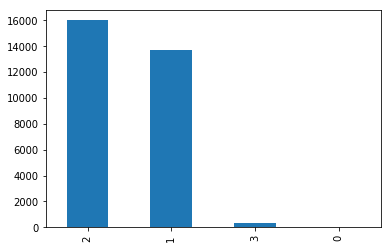

In [21]:
credit.MARRIAGE.value_counts().plot(kind = 'bar')

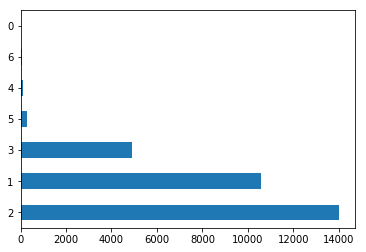

In [307]:
credit.EDUCATION.value_counts().plot(kind = 'barh')

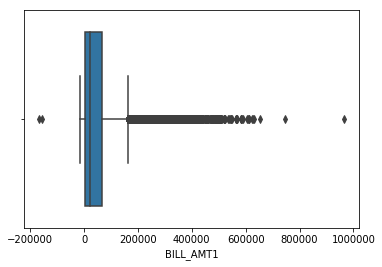

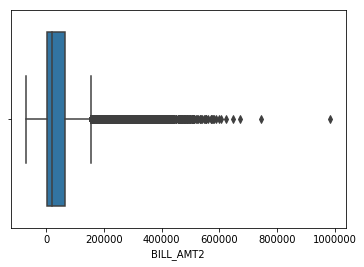

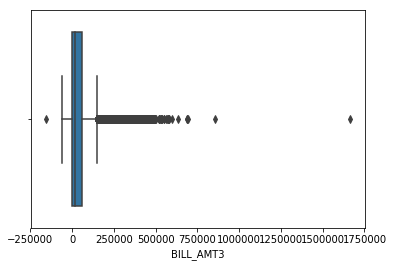

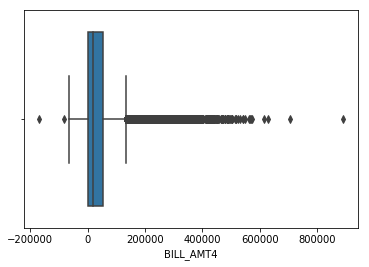

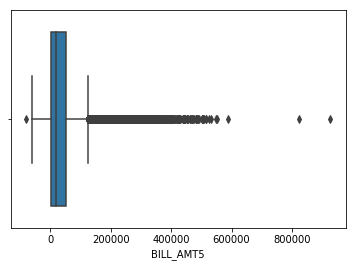

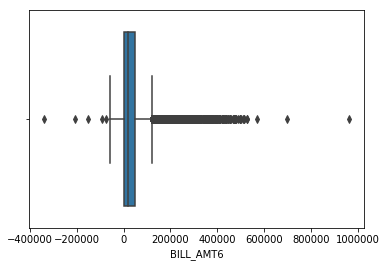

In [316]:
for feature in ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']:
    sns.boxplot(credit[feature])
    plt.show()

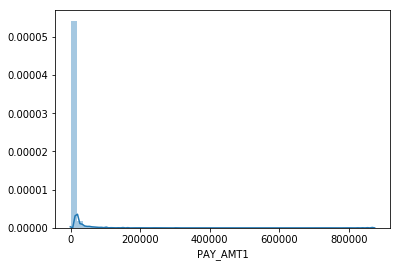

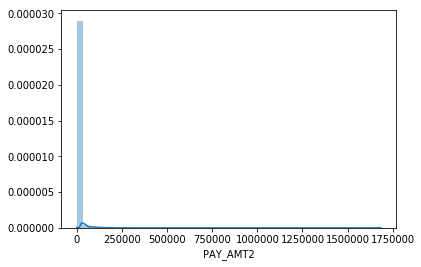

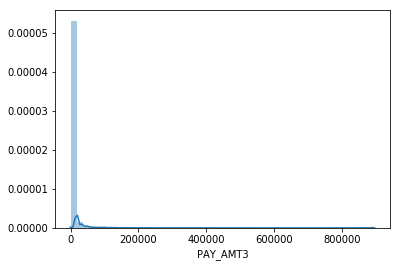

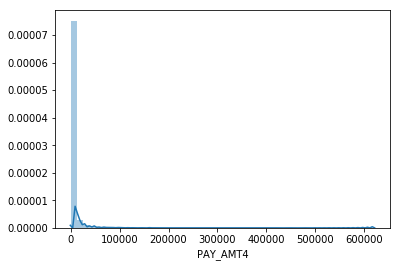

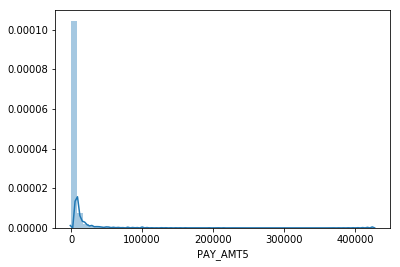

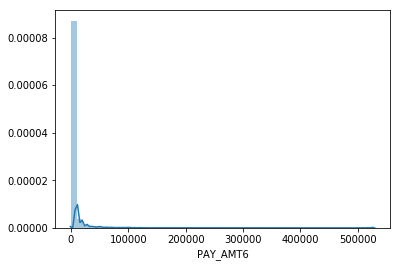

In [321]:
for feature in ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']:
    sns.distplot(credit[feature])
    plt.show()

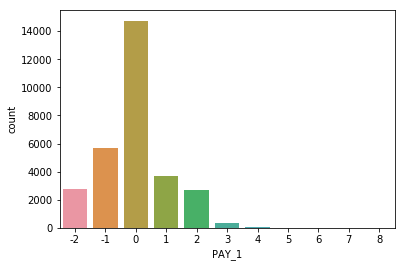

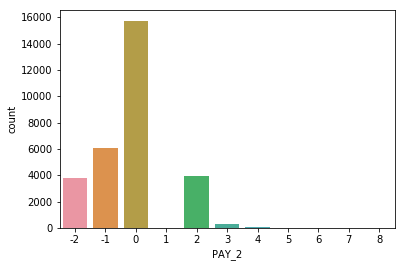

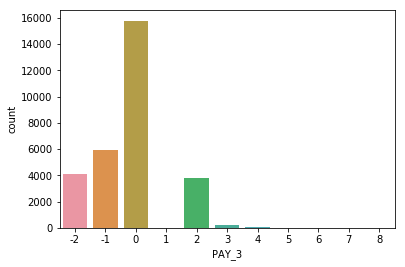

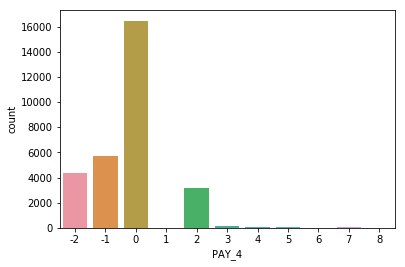

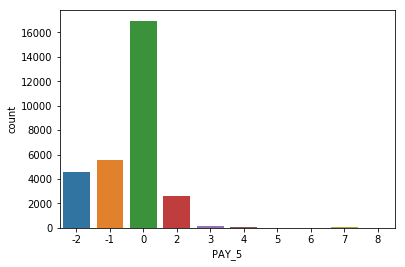

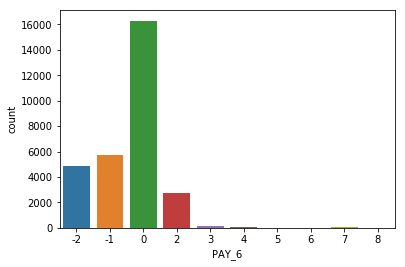

In [24]:
for feature in ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']:
    sns.countplot(credit[feature])
    plt.show()

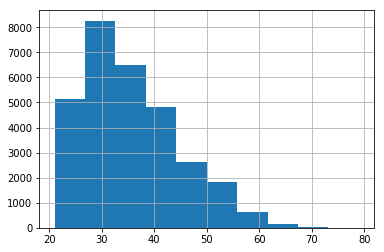

In [336]:
credit.AGE.hist()

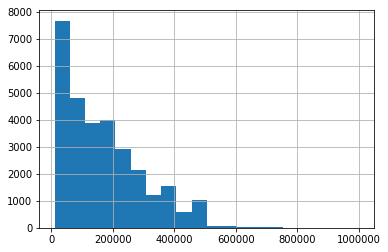

In [22]:
credit.LIMIT_BAL.hist(bins = 20)

In [26]:
# Credit limit have a very large range, it can cause problem to to some models ( for example linear regression models)

### Data Cleaning

1. Marriage 0 can be safely categorized as 'Other'
2. Education 0,5,6 (Unknown label) in Education can be put in other category
3. PAY_n columns have 0,-2(Unknown label) can be imputed as 'pay duly' and we can assign 0,-1,-2 as pay duly 

In [14]:
credit.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [15]:
credit.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

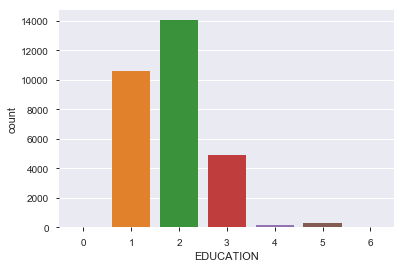

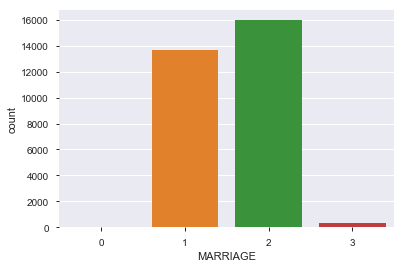

In [16]:
for i in ['EDUCATION','MARRIAGE']:
    plt.figure(figsize = [6,4])
    sns.countplot(credit[i])
    plt.show()

In [8]:
credit.loc[(credit.EDUCATION == 5) | (credit.EDUCATION == 6) | (credit.EDUCATION == 0), 'EDUCATION'] = 4
credit.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [9]:
credit.loc[credit.MARRIAGE == 0,'MARRIAGE'] = 3
credit.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [27]:
# Others in Education can be lower than high school level
# Others in Marriage can be divorced

In [11]:
credit.loc[(credit.PAY_1 == -2) | (credit.PAY_1 == -1) | (credit.PAY_1 == 0), 'PAY_1'] = 0
credit.loc[(credit.PAY_2 == -2) | (credit.PAY_2 == -1) | (credit.PAY_2 == 0), 'PAY_2'] = 0
credit.loc[(credit.PAY_3 == -2) | (credit.PAY_3 == -1) | (credit.PAY_3 == 0), 'PAY_3'] = 0
credit.loc[(credit.PAY_4 == -2) | (credit.PAY_4 == -1) | (credit.PAY_4 == 0), 'PAY_4'] = 0
credit.loc[(credit.PAY_5 == -2) | (credit.PAY_5 == -1) | (credit.PAY_5 == 0), 'PAY_5'] = 0
credit.loc[(credit.PAY_6 == -2) | (credit.PAY_6 == -1) | (credit.PAY_6 == 0), 'PAY_6'] = 0

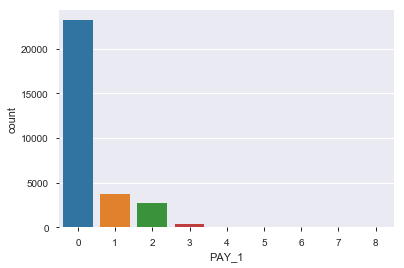

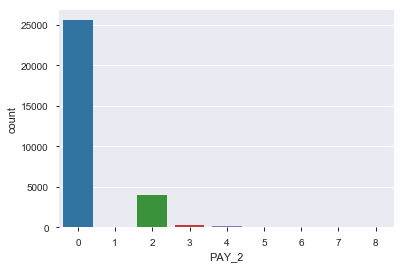

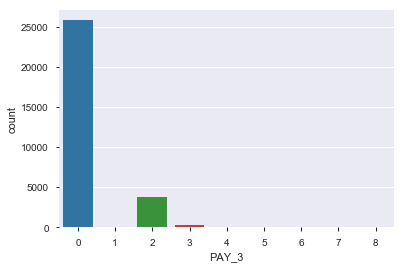

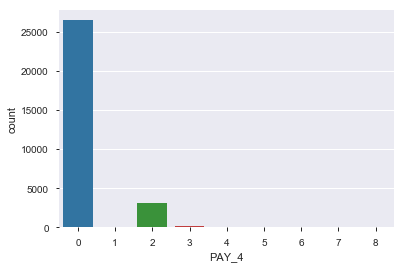

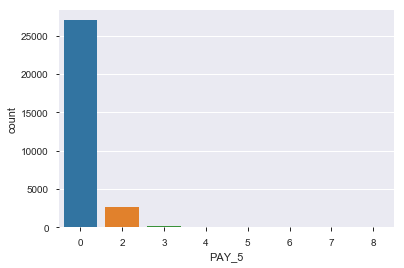

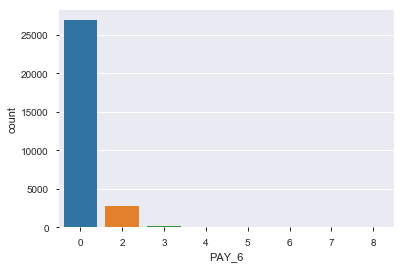

In [20]:
for feature in ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']:
    sns.countplot(credit[feature])
    plt.show()

In [21]:
credit[credit.PAY_AMT1>300000][['LIMIT_BAL','PAY_1','PAY_2','BILL_AMT2','PAY_AMT1','BILL_AMT1','DEFAULT']]

,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT2,PAY_AMT1,BILL_AMT1,DEFAULT
2687,500000,0,0,367979,368199,71921,0
5687,480000,0,0,400000,302000,106660,0
8500,400000,0,0,405016,405016,6500,0
12330,300000,1,0,324392,505000,-165580,0
25431,170000,0,0,167941,304815,30860,0
28003,510000,0,0,481382,493358,71121,0
28716,340000,0,0,176743,873552,139808,0
29820,400000,1,0,394858,423903,396343,0
29867,340000,0,0,331641,300039,44855,0
29963,610000,0,0,322228,323014,348392,0


In [31]:
credit[credit.PAY_AMT2>300000][['LIMIT_BAL','PAY_2','PAY_3','BILL_AMT3','PAY_AMT2','BILL_AMT2','DEFAULT']]

,LIMIT_BAL,PAY_2,PAY_3,BILL_AMT3,PAY_AMT2,BILL_AMT2,DEFAULT
2592,480000,0,0,339176,344261,38929,0
3774,500000,0,0,301441,302961,39356,0
5296,500000,0,0,1664089,1684259,-18088,0
5400,500000,0,0,385228,385228,8970,0
6150,300000,0,0,4735,344467,-5973,1
6864,500000,0,0,444462,300018,201402,0
9044,500000,0,0,384973,384986,24201,0
11568,430000,0,0,354716,358689,960,1
11853,360000,1,0,338600,361560,-22960,0
12829,340000,0,0,330510,312723,335584,1


In [32]:
credit[credit.PAY_AMT3>300000][['LIMIT_BAL','PAY_3','PAY_4','BILL_AMT4','PAY_AMT3','BILL_AMT3','DEFAULT']] 

,LIMIT_BAL,PAY_3,PAY_4,BILL_AMT4,PAY_AMT3,BILL_AMT3,DEFAULT
2197,1000000,0,0,891586,896040,535020,0
6912,590000,0,0,324522,325000,693131,0
7297,430000,0,0,417588,417588,31401,0
13098,460000,0,0,388058,324097,257836,0
15080,500000,0,0,450497,338394,154653,0
17340,200000,0,0,148287,326974,-10542,0
17662,500000,0,0,310852,310852,1558,0
18115,170000,0,0,166969,332809,-157264,0
19918,350000,0,0,369718,371718,5800,0
23449,600000,0,0,380337,380478,82803,0


In [33]:
credit[credit.PAY_AMT4>300000][['LIMIT_BAL','PAY_4','PAY_5','BILL_AMT5','PAY_AMT4','BILL_AMT4','DEFAULT']] 

,LIMIT_BAL,PAY_4,PAY_5,BILL_AMT5,PAY_AMT4,BILL_AMT4,DEFAULT
3183,260000,0,0,171696,497000,-170000,0
4209,480000,0,0,330982,330982,0,0
8355,260000,0,0,142645,331788,-81334,0
11557,480000,0,0,397682,400046,384078,0
13683,430000,0,0,304425,313094,-3849,0
14553,450000,0,0,462666,432130,514249,1
23013,440000,0,0,331985,320008,20849,0
24686,730000,0,0,514114,528897,26873,0
28716,340000,0,0,265431,621000,205931,0


In [122]:
# There are no outliers in the dataset but there are clients with a lot of money. Having higher limit balance and high bill
# statement and high repayment status

### Further Analysis

Now we can see how each attribue is related to dependent variable, can we create new features 

In [12]:
#credit.groupby(['SEX','DEFAULT']).size().unstack(1)
gender = pd.crosstab(credit.SEX, credit.DEFAULT)
gender

DEFAULT,0,1
SEX,,
1,9015,2873
2,14349,3763


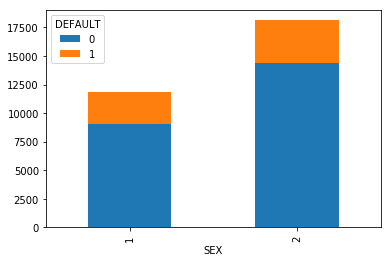

In [13]:
gender.plot(kind = 'bar', stacked = True)

In [14]:
gender['% Default'] = gender[1]/(gender[0]+gender[1])*100

In [15]:
gender
# Men are most likely to default the next payment

DEFAULT,0,1,% Default
SEX,,,
1,9015,2873,24.167227
2,14349,3763,20.776281


In [16]:
def find_per(col1,col2):
    data = pd.crosstab(credit[col1],credit[col2])
    data['% Default'] = (data[data.columns[1]]/(data[data.columns[0]]+data[data.columns[1]]))*100
    return data

In [17]:
find_per('EDUCATION','DEFAULT')
# It seems that higher the education lower is the probability that the person will default next month. Exception is Others who
# have education lower than high school

DEFAULT,0,1,% Default
EDUCATION,,,
1,8549,2036,19.234766
2,10700,3330,23.734854
3,3680,1237,25.157616
4,435,33,7.051282


In [18]:
find_per('MARRIAGE','DEFAULT')
# Married people are more likely to default the next payment. Others is less relevant

DEFAULT,0,1,% Default
MARRIAGE,,,
1,10453,3206,23.471704
2,12623,3341,20.928339
3,288,89,23.607427


In [48]:
credit[['PAY_AMT6', 'BILL_AMT6', 'PAY_AMT5', 'BILL_AMT5', 'PAY_AMT4', 'BILL_AMT4', 'PAY_AMT3', 'BILL_AMT3', 'PAY_AMT2',
        'BILL_AMT2','PAY_AMT1', 'BILL_AMT1','LIMIT_BAL', 'DEFAULT']].sample(20)

,PAY_AMT6,BILL_AMT6,PAY_AMT5,BILL_AMT5,PAY_AMT4,BILL_AMT4,PAY_AMT3,BILL_AMT3,PAY_AMT2,BILL_AMT2,PAY_AMT1,BILL_AMT1,LIMIT_BAL,DEFAULT
2903,0,52773,3997,49601,1801,48738,1894,47632,0,48716,1788,47987,60000,1
10502,9000,273732,12000,306269,12000,300004,10400,324873,12000,328857,14000,341200,350000,1
2498,2055,56977,2146,63751,2177,70579,2396,77330,2671,76012,2846,74969,50000,1
6747,0,1914,3000,1193,0,1291,1193,344,344,1046,1054,4787,150000,0
19571,643,643,643,643,643,926,926,588,588,588,588,588,50000,0
11048,337,3024,400,5220,500,5960,158,11105,1071,23750,3432,50947,50000,0
13780,508,9558,0,9863,0,10313,1000,9618,2000,7759,1200,6827,20000,1
5105,2008,28641,1038,31184,1123,30505,1045,30210,1750,29276,1816,28219,80000,0
29477,1000,15242,0,16016,2000,20411,57,22838,0,23507,3000,21153,50000,1
7302,3000,48795,3000,46365,47280,1518,1545,6203,1051,10876,6083,7639,390000,0


In [83]:
credit[(credit.DEFAULT==1) & (credit.PAY_1==0) & (credit.PAY_2==0) & (credit.PAY_3==0) & (credit.PAY_4==0) & (credit.PAY_5==0) &
      (credit.PAY_6==0)][['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2','PAY_AMT1',
       'BILL_AMT3', 'PAY_AMT2', 'BILL_AMT4', 'PAY_AMT3', 'BILL_AMT5', 'PAY_AMT4', 'BILL_AMT6', 'PAY_AMT5',
        'PAY_AMT6','DEFAULT']]

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LIMIT_BAL,BILL_AMT1,BILL_AMT2,PAY_AMT1,BILL_AMT3,PAY_AMT2,BILL_AMT4,PAY_AMT3,BILL_AMT5,PAY_AMT4,BILL_AMT6,PAY_AMT5,PAY_AMT6,DEFAULT
21,0,0,0,0,0,0,120000,316,316,316,316,316,0,0,632,632,316,316,0,1
23,0,0,0,0,0,0,450000,5512,19420,19428,1473,1473,560,560,0,0,0,0,1128,1
45,0,0,0,0,0,0,210000,0,0,0,0,0,0,0,0,0,0,0,0,1
47,0,0,0,0,0,0,150000,4463,3034,1013,1170,1170,1170,0,0,0,0,0,0,1
60,0,0,0,0,0,0,500000,22848,23638,1516,18878,1300,14937,1000,13827,1000,15571,2000,2000,1
63,0,0,0,0,0,0,50000,28718,29166,1000,0,0,0,0,0,0,0,0,0,1
78,0,0,0,0,0,0,30000,28387,29612,1686,30326,1400,28004,560,26446,3000,6411,1765,0,1
82,0,0,0,0,0,0,60000,26324,27471,1576,28108,1213,21993,648,19899,768,19771,1140,0,1
99,0,0,0,0,0,0,20000,17973,19367,1699,19559,1460,18240,626,17928,1750,150,150,0,1
103,0,0,0,0,0,0,50000,44698,42254,1767,38347,1362,32496,1002,23477,840,24094,995,904,1


In [49]:
# There are some clients in dataset who have joined later in the month and thay have bill statement and payment amount as 0 and
# they will be labeled as Default
# Also 2334 datapoints which are having payment status as 0 but are considered as default

In [87]:
credit[(credit.PAY_6==0) & (credit.BILL_AMT6>0) & (credit.PAY_5>0)][['BILL_AMT6','PAY_AMT5','BILL_AMT5','PAY_5']].head()
# Customers who have not default the payment in April but default the payment in May

,BILL_AMT6,PAY_AMT5,BILL_AMT5,PAY_5
50,39362,1500,38659,2
68,7319,7319,10161,2
72,3151,3165,3848,2
102,469961,18000,471145,2
104,55305,3000,55447,2


In [103]:
credit[(credit.PAY_6==0) & (credit.PAY_5>0) & (credit.BILL_AMT6>0) & (credit.BILL_AMT5==0)][['BILL_AMT6','PAY_AMT5','BILL_AMT5','PAY_5']]

,BILL_AMT6,PAY_AMT5,BILL_AMT5,PAY_5
7546,1006,1006,0,2
8857,4433,4433,0,2
15521,598,598,0,2
20147,7856,7856,0,2
20172,2757,2757,0,2
21543,18300,18300,0,2
23658,2293,2293,0,2
25373,2096,2096,0,2
29042,780,780,0,2


In [91]:
credit[(credit.PAY_6 == 0) & (credit.BILL_AMT6 > 0) & (credit.PAY_5 > 0) & (credit.PAY_AMT5 == 0)][['BILL_AMT6', 'PAY_AMT5', 'BILL_AMT5', 'PAY_5']]
# Payment is not done in May so Payment status in may is delayed but the question is why dealyed for 2 months only

,BILL_AMT6,PAY_AMT5,BILL_AMT5,PAY_5
2272,244,0,244,2
13895,950,0,1340,2
18795,20000,0,20000,2
19933,2240,0,2825,2
20737,18767,0,18767,2
22212,702,0,802,2
22691,249,0,27231,2
23887,25000,0,26000,2
27196,1170,0,1573,2


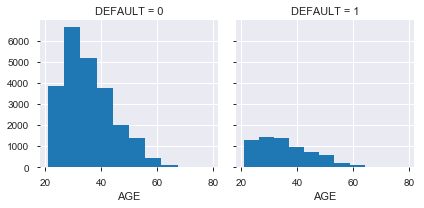

In [28]:
g = sns.FacetGrid(credit, col='DEFAULT')
g.map(plt.hist, 'AGE')
# People with age group 20-40 are more likely to default

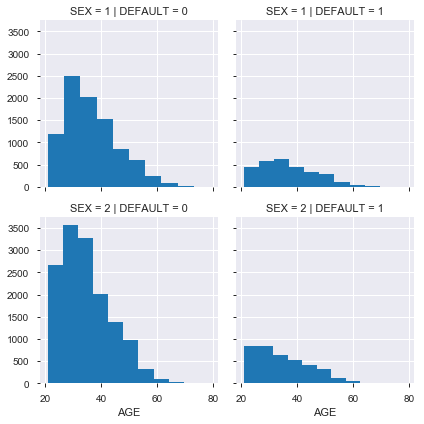

In [29]:
g = sns.FacetGrid(credit, col='DEFAULT', row='SEX')
g.map(plt.hist, 'AGE')
# Male around 25-35 are more likely to default, female 20-27 are more likely to default, lets merge them in one figure

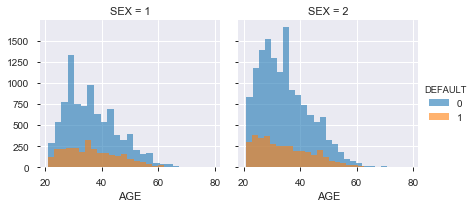

In [30]:
g = sns.FacetGrid(credit, col='SEX', hue='DEFAULT')
g.map(plt.hist, 'AGE', alpha = 0.6, bins = 25)
g.add_legend()

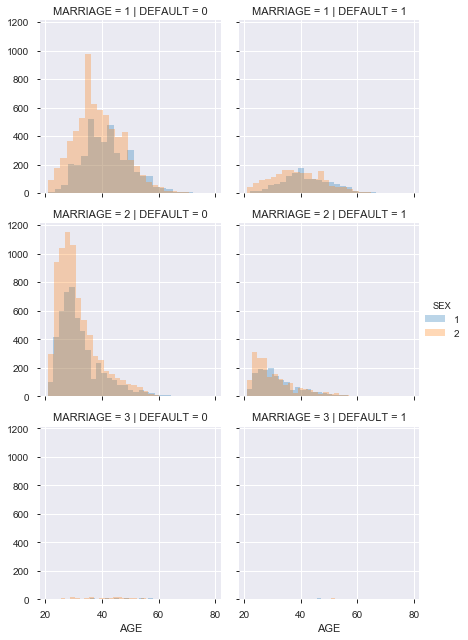

In [31]:
g = sns.FacetGrid(credit, col = 'DEFAULT', row = 'MARRIAGE', hue = 'SEX')
g.map(plt.hist, 'AGE', alpha = 0.3, bins = 25)
g.add_legend()
# We can combine age with other features

### Feature Engineering

In [124]:
# Since we know male are more likely to default and Married people are more likely to default, in feature importance both are
# least significant features so lets combine them to find married man, merried woman.. like features

In [19]:
credit['SE_MA'] = 0
credit.loc[(credit.SEX==1) & (credit.MARRIAGE==1), 'SE_MA'] = 1 # Married Man
credit.loc[(credit.SEX==1) & (credit.MARRIAGE==2), 'SE_MA'] = 2 # Single Man
credit.loc[(credit.SEX==1) & (credit.MARRIAGE==3), 'SE_MA'] = 3 # Divorced Man
credit.loc[(credit.SEX==2) & (credit.MARRIAGE==1), 'SE_MA'] = 4 # Married Woman
credit.loc[(credit.SEX==2) & (credit.MARRIAGE==2), 'SE_MA'] = 5 # Single Woman
credit.loc[(credit.SEX==2) & (credit.MARRIAGE==3), 'SE_MA'] = 6 # Divorced Woman

In [20]:
find_per('SE_MA','DEFAULT')
# It is clear that married man have high chances of default, single woman have low chances of default.
# Among the divorced man are more likely to default but are less in number

DEFAULT,0,1,% Default
SE_MA,,,
1,3844,1346,25.934489
2,5068,1485,22.661376
3,103,42,28.965517
4,6609,1860,21.962451
5,7555,1856,19.721602
6,185,47,20.258621


In [21]:
credit.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [22]:
# Binning of Age column according to descriptive statistics by checking the min,Q1,Median,Q3,Max values and bin the column 
# accordingly
credit['Age_bin'] = 0
credit.loc[(credit.AGE>=21) & (credit.AGE<28), 'Age_bin'] = 1
credit.loc[(credit.AGE>=28) & (credit.AGE<34), 'Age_bin'] = 2
credit.loc[(credit.AGE>=34) & (credit.AGE<41), 'Age_bin'] = 3
credit.loc[(credit.AGE>=41) & (credit.AGE<=79), 'Age_bin'] = 4

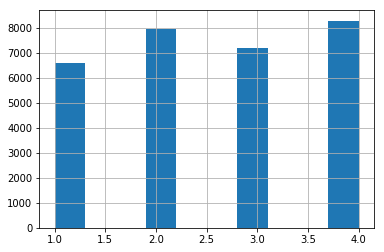

In [23]:
credit.Age_bin.hist()

In [24]:
find_per('Age_bin','DEFAULT')
# People with age group less than 28 are more likely to default

DEFAULT,0,1,% Default
Age_bin,,,
1,5006,1598,24.197456
2,6388,1542,19.445145
3,5672,1520,21.134594
4,6298,1976,23.882040


In [25]:
find_per('Age_bin','SEX')

SEX,1,2,% Default
Age_bin,,,
1,2158,4446,67.322835
2,3085,4845,61.097100
3,2962,4230,58.815350
4,3683,4591,55.487068


In [26]:
credit.Age_bin.value_counts()

4    8274
2    7930
3    7192
1    6604
Name: Age_bin, dtype: int64

In [27]:
# Now lets combine Sex and Age_bin column to find out distribution of sex w.r.t age
credit['Gender_age'] = 0
credit.loc[(credit.SEX==1) & (credit.Age_bin==1), 'Gender_age'] = 1 # Male in 20's
credit.loc[(credit.SEX==1) & (credit.Age_bin==2), 'Gender_age'] = 2 # Male in early 30's
credit.loc[(credit.SEX==1) & (credit.Age_bin==3), 'Gender_age'] = 3 # Male in late 30's
credit.loc[(credit.SEX==1) & (credit.Age_bin==4), 'Gender_age'] = 4 # Male  above 40
credit.loc[(credit.SEX==2) & (credit.Age_bin==1), 'Gender_age'] = 5 # Female in 20's
credit.loc[(credit.SEX==2) & (credit.Age_bin==2), 'Gender_age'] = 6 # Female in early 30's
credit.loc[(credit.SEX==2) & (credit.Age_bin==3), 'Gender_age'] = 7 # Female in late 30's
credit.loc[(credit.SEX==2) & (credit.Age_bin==4), 'Gender_age'] = 8 # Female sbove 40

In [28]:
find_per('Gender_age','DEFAULT')
# Males in early 30's have slightly less chances of default rest all males are almost same
# Females in raely 20's and above 40 have high chances of default

DEFAULT,0,1,% Default
Gender_age,,,
1,1602,556,25.764597
2,2434,651,21.102107
3,2243,719,24.274139
4,2736,947,25.712734
5,3404,1042,23.436797
6,3954,891,18.390093
7,3429,801,18.936170
8,3562,1029,22.413418


In [29]:
# Calculate Monthly Balance for customers
credit['May_balance'] = credit.BILL_AMT5-(credit.BILL_AMT6-credit.PAY_AMT5)
credit['June_balance'] = credit.BILL_AMT4-(credit.BILL_AMT5-credit.PAY_AMT4)
credit['July_balance'] = credit.BILL_AMT3-(credit.BILL_AMT4-credit.PAY_AMT3)
credit['August_balance'] = credit.BILL_AMT2-(credit.BILL_AMT3-credit.PAY_AMT2)
credit['September_balance'] = credit.BILL_AMT1-(credit.BILL_AMT2-credit.PAY_AMT1)

In [216]:
#credit['Limit_bal_april'] = (credit.LIMIT_BAL-credit.BILL_AMT6)/credit.LIMIT_BAL
#credit['Limit_bal_may'] = (credit.LIMIT_BAL-credit.BILL_AMT5)/credit.LIMIT_BAL
#credit['Limit_bal_june'] = (credit.LIMIT_BAL-credit.BILL_AMT4)/credit.LIMIT_BAL
#credit['Limit_bal_july'] = (credit.LIMIT_BAL-credit.BILL_AMT3)/credit.LIMIT_BAL
#credit['Limit_bal_august'] = (credit.LIMIT_BAL-credit.BILL_AMT2)/credit.LIMIT_BAL
#credit['Limit_bal_september'] = (credit.LIMIT_BAL-credit.BILL_AMT1)/credit.LIMIT_BAL

In [30]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT6,DEFAULT,SE_MA,Age_bin,Gender_age,May_balance,June_balance,July_balance,August_balance,September_balance
0,1,20000,2,2,1,24,2,2,0,0,...,0,1,4,1,5,0,0,689,3102,811
1,2,120000,2,2,2,26,0,2,0,0,...,2000,1,5,1,5,194,817,410,43,957
2,3,90000,2,2,2,34,0,0,0,0,...,5000,0,5,3,7,399,383,228,1968,16730
3,4,50000,2,2,1,37,0,0,0,0,...,1000,0,4,3,7,481,455,22177,961,757
4,5,50000,1,2,1,57,0,0,0,0,...,679,0,1,4,4,704,10794,24895,6516,4947


In [22]:
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [32]:
pd.crosstab(credit.SEX, credit.EDUCATION)
# Gender does not have any effect on Education

EDUCATION,1,2,3,4
SEX,,,,
1,4354,5374,1990,170
2,6231,8656,2927,298


In [238]:
chi_2, p_value, deg_freedom, exp_freq = chi2_contingency(pd.crosstab(credit.SEX, credit.EDUCATION))
print('Chi_square:',chi_2, 'P_value: ', p_value, 'Degree of freedom: ', deg_freedom)
# Since p_value < 0.05 so we reject the null hypothesis and conclude that gender have significant difference in education

Chi_square: 23.914258552365347 P_value:  2.603102963371424e-05 Degree of freedom:  3


In [239]:
chi_2, p_value, deg_freedom, exp_freq = chi2_contingency(pd.crosstab(credit.SEX, credit.MARRIAGE))
print('Chi_square:',chi_2, 'P_value: ', p_value, 'Degree of freedom: ', deg_freedom)

Chi_square: 28.87017174414975 P_value:  5.381729435247895e-07 Degree of freedom:  2


In [260]:
chi_2, p_value, deg_freedom, exp_freq = chi2_contingency(pd.crosstab(credit.SEX, credit.DEFAULT))
print('Chi_square:',chi_2, 'P_value: ', p_value, 'Degree of freedom: ', deg_freedom)

Chi_square: 47.70879689062111 P_value:  4.944678999412044e-12 Degree of freedom:  1


In [23]:
chi_2, p_value, deg_freedom, exp_freq = chi2_contingency(pd.crosstab(credit.MARRIAGE, credit.DEFAULT))
print('Chi_square:',chi_2, 'P_value: ', p_value, 'Degree of freedom: ', deg_freedom)

Chi_square: 35.66239583433609 P_value:  8.825862457577375e-08 Degree of freedom:  3


In [24]:
chi_2, p_value, deg_freedom, exp_freq = chi2_contingency(pd.crosstab(credit.EDUCATION, credit.DEFAULT))
print('Chi_square:',chi_2, 'P_value: ', p_value, 'Degree of freedom: ', deg_freedom)

Chi_square: 163.21655786997073 P_value:  1.2332626245415605e-32 Degree of freedom:  6


#### Anova and ttest

In [243]:
male = credit[credit.SEX==1]
female = credit[credit.SEX==2]

In [245]:
ttest_ind(male.LIMIT_BAL, female.LIMIT_BAL)

Ttest_indResult(statistic=-4.288903937895565, pvalue=1.8011800666712788e-05)

In [255]:
ttest_ind(credit.AGE,credit.LIMIT_BAL)

Ttest_indResult(statistic=-223.53381125010105, pvalue=0.0)

In [247]:
mod = ols('LIMIT_BAL ~ SEX', data = credit).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
# Reject null hupothesis, there is significant difference in limit balance and sex

                sum_sq       df          F    PR(>F)
SEX       3.094853e+11      1.0  18.394697  0.000018
Residual  5.047074e+14  29998.0        NaN       NaN


In [250]:
mod = ols('LIMIT_BAL ~ EDUCATION', data = credit).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq       df            F  PR(>F)
EDUCATION  2.696863e+13      1.0  1692.308385     0.0
Residual   4.780482e+14  29998.0          NaN     NaN


In [253]:
mod = ols('LIMIT_BAL ~ MARRIAGE', data = credit).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq       df           F        PR(>F)
MARRIAGE  6.223679e+12      1.0  374.299315  6.945399e-83
Residual  4.987932e+14  29998.0         NaN           NaN


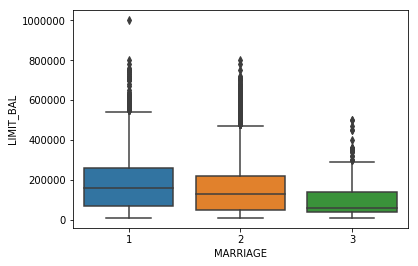

In [254]:
sns.boxplot(credit.MARRIAGE, credit.LIMIT_BAL)

In [44]:
data = credit.copy()

In [49]:
X = data.drop(['ID','DEFAULT','AGE'], axis=1)
y = data['DEFAULT']

In [76]:
#!pip install imblearn

In [25]:
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score

In [53]:
n = Normalizer()

### Decision Tree

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)
norm_train = n.fit_transform(X_train)
norm_test = n.transform(X_test)

In [64]:
for i in range(90,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i, test_size=0.3)
    norm_train = n.fit_transform(X_train)
    norm_test = n.transform(X_test)
    tree = DecisionTreeClassifier(max_depth=7)
    tree.fit(norm_train,y_train)
    tree_pred = tree.predict(norm_test)   

In [66]:
print('Train Accuracy: ', tree.score(norm_train,y_train))
print('Test Accuracy: ', tree.score(norm_test,y_test))
print('F1 Score: ', f1_score(y_test,tree_pred))
print('Recall Accuracy: ', recall_score(y_test,tree_pred))
print('Precision Accuracy: ', precision_score(y_test,tree_pred))

Train Accuracy:  0.7802857142857142
Test Accuracy:  0.7753333333333333
F1 Score:  0.4556386090347741
Recall Accuracy:  0.3466864490603363
Precision Accuracy:  0.6644549763033175


In [73]:
tree = DecisionTreeClassifier()
params = ({'max_depth':np.arange(3,6), 'criterion':['gini','entropy'], "max_leaf_nodes":[5,10,20,100], 'min_samples_split':
          [2,5,10,20], 'class_weight':['balanced']})
grid = GridSearchCV(tree, params, cv = 5, scoring = 'f1')
grid.fit(norm_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([3, 4, 5]), 'criterion': ['gini', 'entropy'], 'max_leaf_nodes': [5, 10, 20, 100], 'min_samples_split': [2, 5, 10, 20], 'class_weight': ['balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [74]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 20,
 'min_samples_split': 2}

In [75]:
tree = grid.best_estimator_
tree.fit(norm_train,y_train)
tree_pred = tree.predict(norm_test)
print('Train Accuracy: ', tree.score(norm_train,y_train))
print('Test Accuracy: ', tree.score(norm_test,y_test))
print('F1 Score: ', f1_score(y_test,tree_pred))
print('Recall Accuracy: ', recall_score(y_test,tree_pred))
print('Precision Accuracy: ', precision_score(y_test,tree_pred))
# {'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 6}
# {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}

Train Accuracy:  0.7599047619047619
Test Accuracy:  0.7478888888888889
F1 Score:  0.5303249844752639
Recall Accuracy:  0.6335311572700296
Precision Accuracy:  0.45603417586329653


### Smote

In [79]:
print(norm_train.shape)
print(y_train.shape)

(21000, 30)
(21000,)


In [125]:
SM = SMOTE(random_state = 589, ratio = 1)
X_smote, y_smote = SM.fit_sample(norm_train, y_train)

C:\Users\Deepak yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [126]:
tree = DecisionTreeClassifier(max_depth=7)
tree.fit(norm_train,y_train)
tree_pred = tree.predict(norm_test)
print('Train Accuracy: ', tree.score(norm_train,y_train))
print('Test Accuracy: ', tree.score(norm_test,y_test))
print('F1 Score: ', f1_score(y_test,tree_pred))
print('Recall Accuracy: ', recall_score(y_test,tree_pred))
print('Precision Accuracy: ', precision_score(y_test,tree_pred))
print('Cohen Kappa: ', precision_score(y_test,tree_pred))

Train Accuracy:  0.8335714285714285
Test Accuracy:  0.8064444444444444
F1 Score:  0.4549436795994994
Recall Accuracy:  0.37320328542094455
Precision Accuracy:  0.5825320512820513
Cohen Kappa:  0.5825320512820513


In [127]:
# Now we can compare that by applying smote our F1 score and Recall is increasing
tree = DecisionTreeClassifier(max_depth=7)
tree.fit(X_smote,y_smote)
tree_pred = tree.predict(norm_test)
print('Train Accuracy: ', tree.score(X_smote,y_smote))
print('Test Accuracy: ', tree.score(norm_test,y_test))
print('F1 Score: ', f1_score(y_test,tree_pred))
print('Recall: ', recall_score(y_test,tree_pred))
print('Precision: ', precision_score(y_test,tree_pred))
print('Cohen Kappa: ', precision_score(y_test,tree_pred))

Train Accuracy:  0.7012015693967631
Test Accuracy:  0.7815555555555556
F1 Score:  0.45840220385674935
Recall:  0.4271047227926078
Precision:  0.4946492271105826
Cohen Kappa:  0.4946492271105826


In [121]:
tree = DecisionTreeClassifier()
params = ({'max_depth':np.arange(3,6), 'criterion':['gini','entropy'], "max_leaf_nodes":[5,10,20,100], 'min_samples_split':
          [2,5,10,20], 'class_weight':['balanced']})
grid = GridSearchCV(tree, params, cv = 5, scoring = 'f1')
grid.fit(X_smote,y_smote)
print('Best Params: ',grid.best_params_)
print('Best Estimator: ',grid.best_estimator_)
print('-----------------------------------')
tree = grid.best_estimator_
tree.fit(X_smote,y_smote)
tree_pred = tree.predict(norm_test)
print('Train Accuracy: ', tree.score(X_smote,y_smote))
print('Test Accuracy: ', tree.score(norm_test,y_test))
print('F1 Score: ', f1_score(y_test,tree_pred))
print('Recall: ', recall_score(y_test,tree_pred))
print('Precision: ', precision_score(y_test,tree_pred))
print('Cohen Kappa: ', precision_score(y_test,tree_pred))

Best Params:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_split': 2}
Best Estimator:  DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
-----------------------------------
Train Accuracy:  0.6207433174661297
Test Accuracy:  0.7491111111111111
F1 Score:  0.4035921817221342
Recall:  0.3778437190900099
Precision:  0.4331065759637188
Cohen Kappa:  0.4331065759637188


### Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier

In [134]:
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train,y_train)
RF_pred = RF.predict(X_test)

print('Train Accuracy: ', RF.score(X_train,y_train))
print('Test Accuracy: ', RF.score(X_test,y_test))
print('F1 Score: ', f1_score(y_test,RF_pred))
print('Recall: ', recall_score(y_test,RF_pred))
print('Precision: ', precision_score(y_test,RF_pred))
print('Cohen Kappa: ', precision_score(y_test,RF_pred))

Train Accuracy:  0.9972380952380953
Test Accuracy:  0.8151111111111111
F1 Score:  0.4666666666666667
Recall:  0.3737166324435318
Precision:  0.621160409556314
Cohen Kappa:  0.621160409556314


In [136]:
# Random Forest with X_train, y_train
RF = RandomForestClassifier()
params = {'criterion':['entropy','gini'], 'max_depth':range(2,6),"max_leaf_nodes":[5,10,20,100], 
          'min_samples_split':[2,5,10,20], 'class_weight':['balanced']}
grid = GridSearchCV(RF, params, cv = 5, scoring = 'f1')
grid.fit(X_train,y_train)
print('Best Params: ',grid.best_params_)
print('Best Estimator: ',grid.best_estimator_)
print('-----------------------------------')
RF = grid.best_estimator_
RF.fit(X_train,y_train)
RF_pred = RF.predict(X_test)
print('Train Accuracy: ', RF.score(X_train,y_train))
print('Test Accuracy: ', RF.score(X_test,y_test))
print('F1 Score: ', f1_score(y_test,RF_pred))
print('Recall: ', recall_score(y_test,RF_pred))
print('Precision: ', precision_score(y_test,RF_pred))
print('Cohen Kappa: ', precision_score(y_test,RF_pred)) # 12 min

Best Params:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 100, 'min_samples_split': 2}
Best Estimator:  RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=100, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
-----------------------------------
Train Accuracy:  0.7431904761904762
Test Accuracy:  0.732
F1 Score:  0.5059401884473576
Recall:  0.6339835728952772
Precision:  0.4209270620313565
Cohen Kappa:  0.4209270620313565


In [137]:
# Random Forest with X_smote, y_smote
RF = RandomForestClassifier()
params = {'criterion':['entropy','gini'], 'max_depth':range(2,6),"max_leaf_nodes":[5,10,20,100], 
          'min_samples_split':[2,5,10,20], 'class_weight':['balanced']}
grid = GridSearchCV(RF, params, cv = 5, scoring = 'f1')
grid.fit(X_smote,y_smote)
print('Best Params: ',grid.best_params_)
print('Best Estimator: ',grid.best_estimator_)
print('-----------------------------------')
RF = grid.best_estimator_
RF.fit(X_smote,y_smote)
RF_pred = RF.predict(X_test)
print('Train Accuracy: ', RF.score(X_smote,y_smote))
print('Test Accuracy: ', RF.score(X_test,y_test))
print('F1 Score: ', f1_score(y_test,RF_pred))
print('Recall: ', recall_score(y_test,RF_pred))
print('Precision: ', precision_score(y_test,RF_pred))
print('Cohen Kappa: ', precision_score(y_test,RF_pred))

# Smote is not able to increase the accuracy of model

Best Params:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 100, 'min_samples_split': 10}
Best Estimator:  RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=100, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
-----------------------------------
Train Accuracy:  0.7535863168219715
Test Accuracy:  0.7594444444444445
F1 Score:  0.4095991273520589
Recall:  0.385523613963039
Precision:  0.43688190808609656
Cohen Kappa:  0.43688190808609656


### Adaboost

In [143]:
ada = AdaBoostClassifier(n_estimators = 100, random_state = 0)
ada.fit(X_train,y_train)
ada_pred = ada.predict(X_test)
print('Train Accuracy: ', ada.score(X_train,y_train))
print('Test Accuracy: ', ada.score(X_test,y_test))
print('F1 Score: ', f1_score(y_test,ada_pred))
print('Recall Accuracy: ', recall_score(y_test,ada_pred))
print('Precision Accuracy: ', precision_score(y_test,ada_pred))
print('Cohen Kappa: ', precision_score(y_test,ada_pred))

Train Accuracy:  0.8186666666666667
Test Accuracy:  0.818
F1 Score:  0.44171779141104295
Recall Accuracy:  0.3326488706365503
Precision Accuracy:  0.6572008113590264
Cohen Kappa:  0.6572008113590264


### Bagging Classifier

In [147]:
BC = BaggingClassifier(oob_score = True)
BC.fit(X_train,y_train)
BC_pred = BC.predict(X_test)
print('Train Accuracy: ', BC.score(X_train,y_train))
print('Test Accuracy: ', BC.score(X_test,y_test))
print('F1 Score: ', f1_score(y_test,BC_pred))
print('Recall Accuracy: ', recall_score(y_test,BC_pred))
print('Precision Accuracy: ', precision_score(y_test,BC_pred))
print('Cohen Kappa: ', precision_score(y_test,BC_pred))

C:\Users\Deepak yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Deepak yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


Train Accuracy:  0.9777619047619047
Test Accuracy:  0.8021111111111111
F1 Score:  0.4238110643804594
Recall Accuracy:  0.3362422997946612
Precision Accuracy:  0.5730533683289589
Cohen Kappa:  0.5730533683289589
